**Fase 1: Business/Data Understanding**

In [1]:
import pandas as pd
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights_dataset.csv')

C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_26316\2851676583.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights_dataset.csv')


In [2]:
flights.shape

(5729195, 27)

In [3]:
flights_nodig = flights[0:100000]
flights_nodig

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,1448,404.0,4.0,430,408.0,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,2330,737.0,4.0,750,741.0,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,2296,800.0,11.0,806,811.0,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,2342,748.0,8.0,805,756.0,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,1448,254.0,5.0,320,259.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,1,7,3,AA,162,N5DEAA,HNL,LAX,1338,...,2556,2033.0,11.0,2103,2044.0,NaN,NaN,NaN,NaN,NaN
99996,2015,1,7,3,B6,844,N351JB,CHS,DCA,1338,...,444,1522.0,2.0,1456,1524.0,0.0,0.0,0.0,28.0,0.0
99997,2015,1,7,3,EV,4096,N14991,ORD,CHS,1338,...,760,1637.0,8.0,1650,1645.0,NaN,NaN,NaN,NaN,NaN
99998,2015,1,7,3,OO,6287,N905SW,SFO,SBA,1338,...,262,1449.0,7.0,1449,1456.0,NaN,NaN,NaN,NaN,NaN


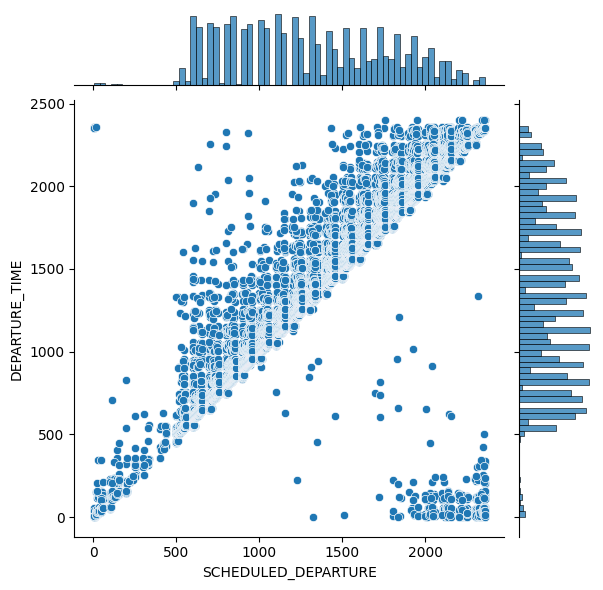

In [4]:
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
#Dit betekent dat er veel gevallen zijn waarin de werkelijke vertrektijd ("DEPARTURE_TIME") later is dan de geplande vertrektijd ("SCHEDULED_DEPARTURE"). In een context van vluchtgegevens kan dit duiden op vertragingen in het vertrek van de vluchten.
sb.jointplot(data=flights_nodig, x="SCHEDULED_DEPARTURE", y="DEPARTURE_TIME")

In [5]:
corr = flights_nodig.corr(method='pearson')

C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_26316\3369061735.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = flights_nodig.corr(method='pearson')


<Axes: >

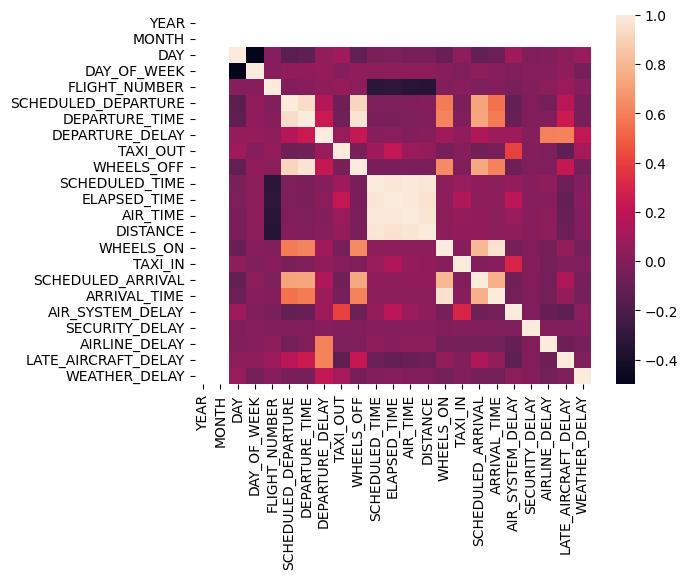

In [6]:
sb.heatmap(corr)

In [7]:
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.500245,0.006469,-0.143896,-0.126434,0.053874,0.086968,-0.121594,...,-0.037377,-0.091182,0.033128,-0.111504,-0.086568,0.093943,-0.008875,-0.005287,0.032071,0.062693
DAY_OF_WEEK,NaN,NaN,-0.500245,1.000000,0.009302,0.048609,0.047382,0.056633,0.007689,0.045963,...,0.024587,0.013405,-0.016776,0.031457,0.010924,-0.019581,0.007637,0.004842,0.033108,-0.051237
FLIGHT_NUMBER,NaN,NaN,0.006469,0.009302,1.000000,-0.004977,0.009838,0.035249,0.062342,0.016288,...,-0.352973,-0.005080,0.014519,-0.021843,-0.000673,-0.032631,-0.006599,0.022514,0.078688,0.005523
SCHEDULED_DEPARTURE,NaN,NaN,-0.143896,0.048609,-0.004977,1.000000,0.943207,0.172293,-0.080323,0.912165,...,0.000219,0.584909,-0.027095,0.727507,0.551765,-0.111136,-0.017856,-0.053057,0.183808,-0.042451
DEPARTURE_TIME,NaN,NaN,-0.126434,0.047382,0.009838,0.943207,1.000000,0.243952,-0.068738,0.966609,...,-0.016165,0.618220,-0.017278,0.734162,0.583990,-0.091497,-0.012794,-0.011866,0.246071,-0.045665
DEPARTURE_DELAY,NaN,NaN,0.053874,0.056633,0.035249,0.172293,0.243952,1.000000,0.063319,0.231796,...,0.005636,0.092073,0.040692,0.153365,0.081109,0.086522,0.007502,0.604608,0.608404,0.210501
TAXI_OUT,NaN,NaN,0.086968,0.007689,0.062342,-0.080323,-0.068738,0.063319,1.000000,-0.041379,...,0.057864,-0.043465,0.008490,-0.061260,-0.044019,0.406633,-0.007766,-0.025335,-0.128864,0.118934
WHEELS_OFF,NaN,NaN,-0.121594,0.045963,0.016288,0.912165,0.966609,0.231796,-0.041379,1.000000,...,-0.026760,0.641722,-0.014686,0.743692,0.607983,-0.083709,-0.013881,-0.016021,0.222005,-0.054263


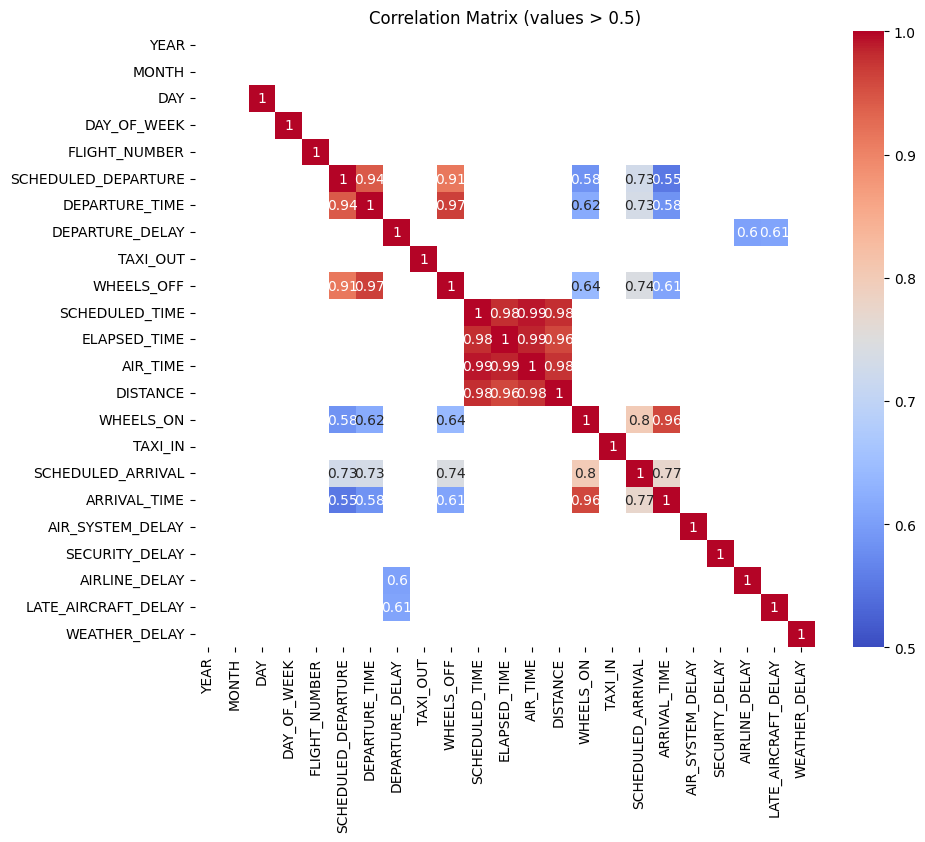

In [8]:
import matplotlib.pyplot as plt

# Filter de waarden die groter zijn dan 0.5
high_corr = corr[corr > 0.5]

# Gebruik seaborn voor een visuele representatie
plt.figure(figsize=(10, 8))
sb.heatmap(high_corr, annot=True, cmap='coolwarm', vmin=0.5)
plt.title('Correlation Matrix (values > 0.5)')
plt.show()


In [9]:
flights_nodig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          100000 non-null  object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       100000 non-null  float64
 11  DEPARTURE_DELAY      100000 non-null  float64
 12  TAXI_OUT             100000 non-null  float64
 13  WHEELS_OFF           100000 non-null  float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

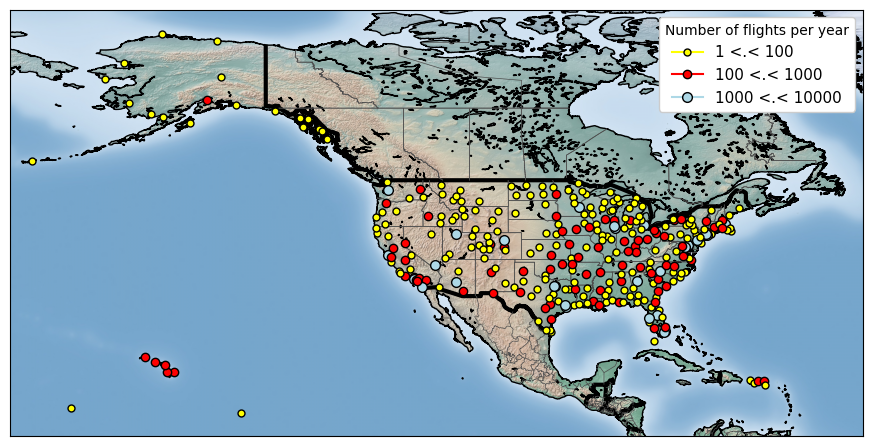

In [36]:
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec

count_flights = flights_nodig['ORIGIN_AIRPORT'].value_counts()
#___________________________
#___________________________
plt.figure(figsize=(11,11))
#________________________________________
# define properties of markers and labels
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 
#____________________________________________________________
map = Basemap(resolution='i', llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth=3)
map.drawstates(color='0.3')
#_____________________
# put airports on map
for index, (code, y, x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights.get(code, 0)]
    ind = isize[-1] if isize else 0  # Use 0 if isize is empty
    map.plot(x, y, marker='o', markersize=ind+5, markeredgewidth=1, color=colors[ind],
             markeredgecolor='k', label=labels[ind])
#_____________________________________________
# remove duplicate labels and set their order
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ['1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000', '100000 <.< 1000000']
new_label = OrderedDict()

for key in key_order:
    if key in by_label:
        new_label[key] = by_label[key]
    else:
        print(f"Warning: Key '{key}' not found in legend.")

plt.legend(new_label.values(), new_label.keys(), loc=1, prop={'size': 11},
           title='Number of flights per year', frameon=True, framealpha=1)
plt.show()

In [37]:
flights_nodig['DATE'] = pd.to_datetime(flights_nodig[['YEAR','MONTH', 'DAY']])

C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_26316\2338291173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_nodig['DATE'] = pd.to_datetime(flights_nodig[['YEAR','MONTH', 'DAY']])


In [41]:
import datetime, warnings, scipy 
# Function that converts the 'HHMM' string to datetime.time
def format_tijd(uur):
    if pd.isnull(uur):
        return np.nan
    else:
        if uur == 2400:
            uur = 0
        uur = "{0:04d}".format(int(uur))
        tijd = datetime.time(int(uur[0:2]), int(uur[2:4]))
        return tijd

# Function that combines a date and time to produce a datetime.datetime
def datum_tijd_combineren(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        if isinstance(x[1], datetime.time):
            return datetime.datetime.combine(x[0], x[1])
        elif isinstance(x[1], (int, np.int64, np.float64)):
            # Convert numeric value to datetime.time
            hours, minutes = divmod(int(x[1]), 100)
            time_obj = datetime.time(hours, minutes)
            return datetime.datetime.combine(x[0], time_obj)
        else:
            raise ValueError(f"Unexpected type for time: {type(x[1])}")

# Function that combines two columns of the dataframe to create a datetime format
def create_flight_time(df, col):
    lijst = []
    for index, cols in df[['DATE', col]].iterrows():
        if pd.isnull(cols[1]):
            lijst.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0, 0)
            lijst.append(datum_tijd_combineren(cols))
        else:
            # Apply format_heure only if the column contains a string (not datetime)
            if isinstance(cols[1], str):
                cols[1] = format_tijd(cols[1])
            lijst.append(datum_tijd_combineren(cols))
    return pd.Series(lijst)

In [43]:
import numpy as np
flights_nodig['SCHEDULED_DEPARTURE'] = create_flight_time(flights_nodig, 'SCHEDULED_DEPARTURE')
flights_nodig['DEPARTURE_TIME'] = flights_nodig['DEPARTURE_TIME'].apply(format_tijd)
flights_nodig['SCHEDULED_ARRIVAL'] = flights_nodig['SCHEDULED_ARRIVAL'].apply(format_tijd)
flights_nodig['ARRIVAL_TIME'] = flights_nodig['ARRIVAL_TIME'].apply(format_tijd)

# Display the DataFrame
print(flights_nodig.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME', 'ARRIVAL_TIME', 'DEPARTURE_DELAY']])

C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_26316\3526989962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_nodig['SCHEDULED_DEPARTURE'] = create_flight_time(flights_nodig, 'SCHEDULED_DEPARTURE')
C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_26316\3526989962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_nodig['DEPARTURE_TIME'] = flights_nodig['DEPARTURE_TIME'].apply(format_tijd)
C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_26316\3526989962.py:4: Setti

  SCHEDULED_DEPARTURE SCHEDULED_ARRIVAL DEPARTURE_TIME ARRIVAL_TIME  \
0 2015-01-01 00:05:00          04:30:00       23:54:00     04:08:00   
1 2015-01-01 00:10:00          07:50:00       00:02:00     07:41:00   
2 2015-01-01 00:20:00          08:06:00       00:18:00     08:11:00   
3 2015-01-01 00:20:00          08:05:00       00:15:00     07:56:00   
4 2015-01-01 00:25:00          03:20:00       00:24:00     02:59:00   
5 2015-01-01 00:25:00          06:02:00       00:20:00     06:10:00   

   DEPARTURE_DELAY  
0            -11.0  
1             -8.0  
2             -2.0  
3             -5.0  
4             -1.0  
5             -5.0  


C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_26316\3526989962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_nodig['ARRIVAL_TIME'] = flights_nodig['ARRIVAL_TIME'].apply(format_tijd)


In [45]:
flights_data = flights_nodig.drop(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'TAIL_NUMBER', 'FLIGHT_NUMBER', 'TAXI_OUT', 'WHEELS_OFF', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], axis=1)
flights_data.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DATE
0,AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,205.0,194.0,04:30:00,04:08:00,2015-01-01
1,AA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,280.0,279.0,07:50:00,07:41:00,2015-01-01
2,US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,286.0,293.0,08:06:00,08:11:00,2015-01-01
3,AA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,285.0,281.0,08:05:00,07:56:00,2015-01-01
4,AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,235.0,215.0,03:20:00,02:59:00,2015-01-01


In [46]:
missing_variables = flights_data.isnull().sum(axis=0).reset_index()
missing_variables.columns = ['variable', 'missing values']
missing_variables['filling factor (%)']=(flights_data.shape[0]-missing_variables['missing values'])/flights_data.shape[0]*100
missing_variables.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ELAPSED_TIME,230,99.770
1,ARRIVAL_TIME,55,99.945
2,AIRLINE,0,100.000
3,ORIGIN_AIRPORT,0,100.000
4,DESTINATION_AIRPORT,0,100.000
5,SCHEDULED_DEPARTURE,0,100.000
6,DEPARTURE_TIME,0,100.000
7,DEPARTURE_DELAY,0,100.000
8,SCHEDULED_TIME,0,100.000
9,SCHEDULED_ARRIVAL,0,100.000


In [47]:
flights_data.dropna(inplace=True)

In [48]:
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [49]:
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = flights_data['DEPARTURE_DELAY'].groupby(flights_data['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE,,,,
VX,-16.0,359.0,1056.0,8.036932
HA,-13.0,830.0,1355.0,8.352768
F9,-21.0,516.0,1539.0,33.072775
NK,-23.0,557.0,1821.0,27.351455
AS,-39.0,444.0,2888.0,6.913089
B6,-24.0,500.0,4750.0,18.382526
MQ,-19.0,780.0,5558.0,34.026808
US,-20.0,638.0,7072.0,10.998445
UA,-19.0,886.0,8547.0,24.287235


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

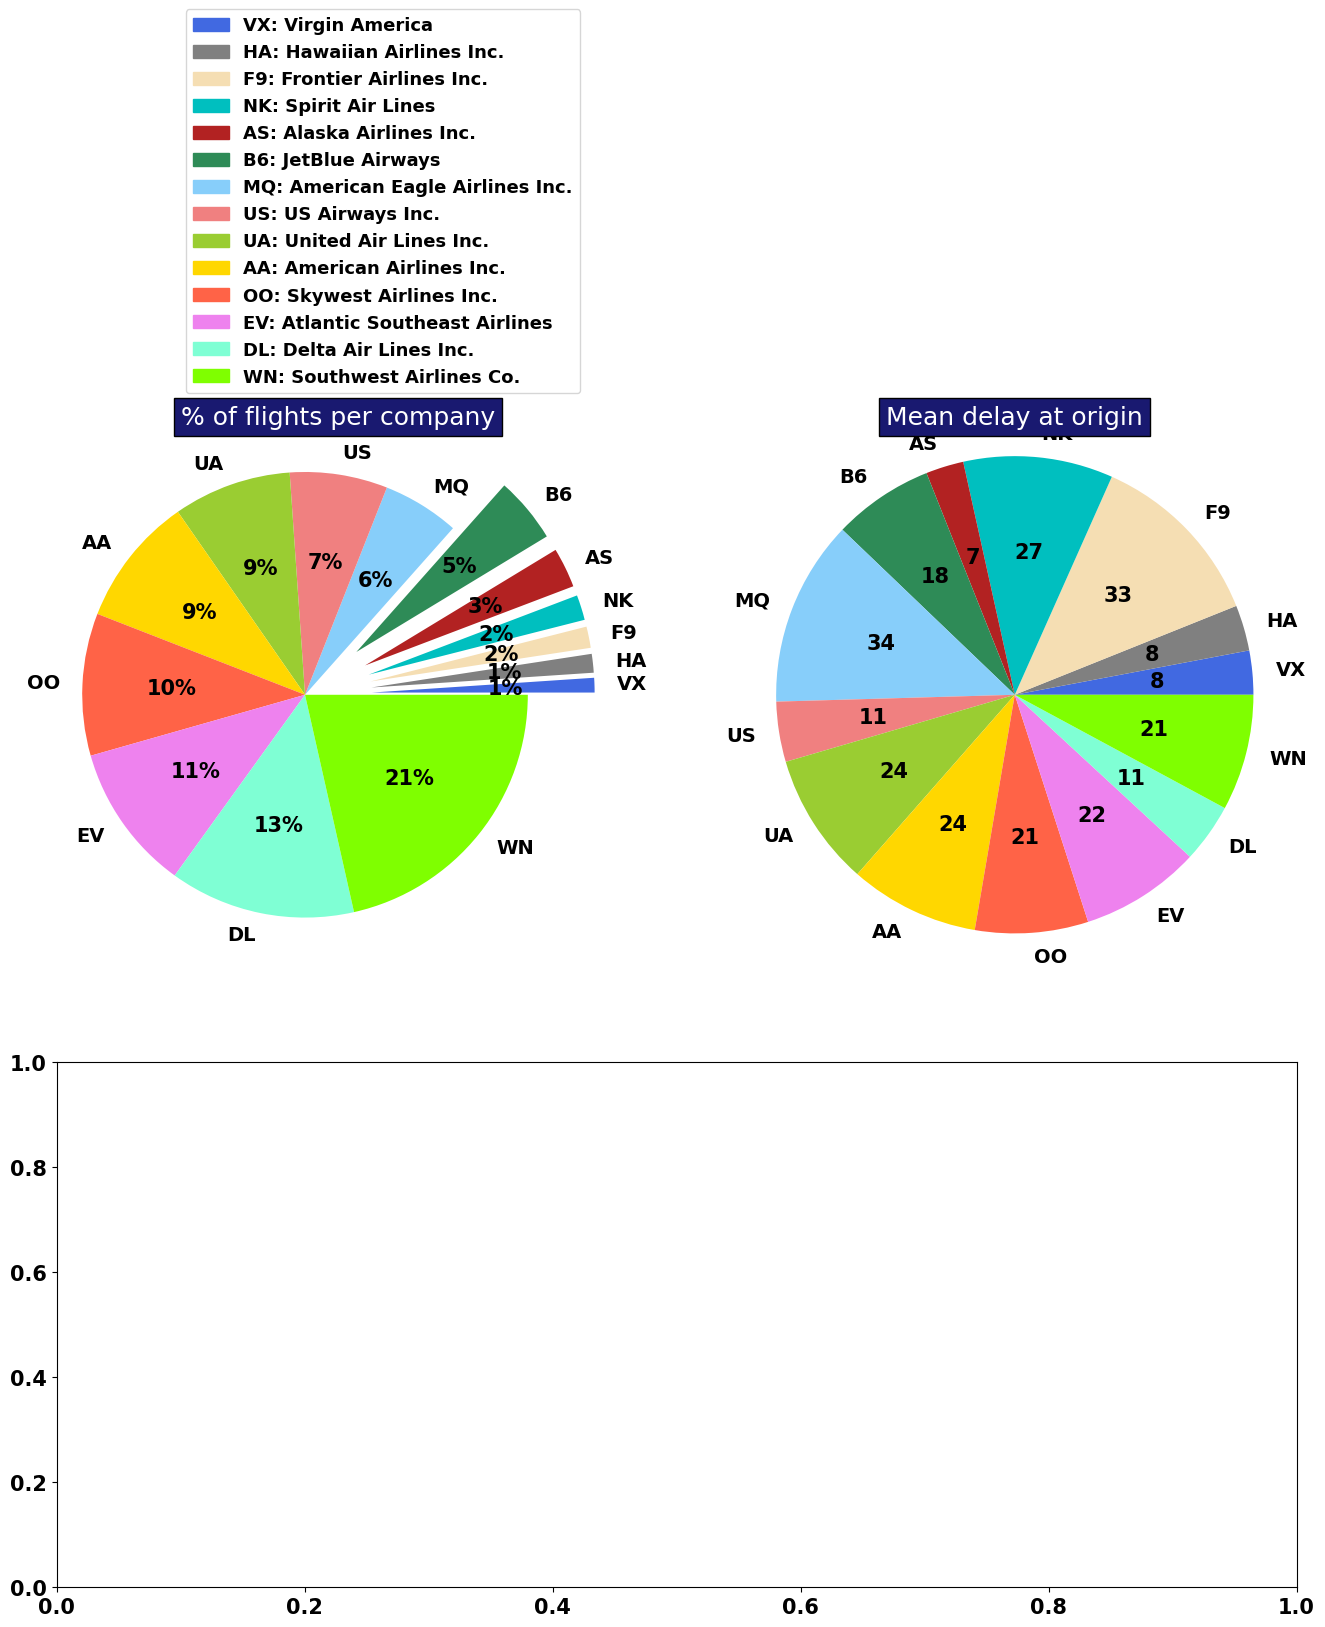

In [53]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
flights_2 = flights_data.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
flights_2['AIRLINE'] = flights_2['AIRLINE'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 5000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

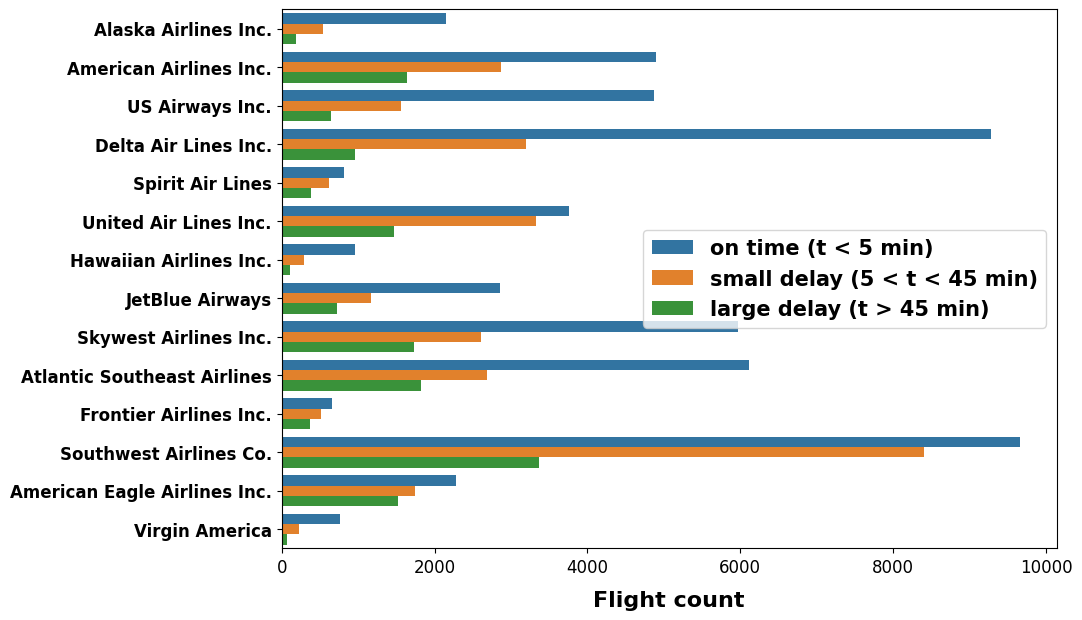

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flights_data['DELAY_LEVEL'] = flights_data['DEPARTURE_DELAY'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=flights_data)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

In [57]:
identify_airport = airports.set_index('IATA_CODE')['CITY'].to_dict()
latitude_airport = airports.set_index('IATA_CODE')['LATITUDE'].to_dict()
longitude_airport = airports.set_index('IATA_CODE')['LONGITUDE'].to_dict()

In [58]:
airport_mean_delays = pd.DataFrame(pd.Series(flights_data['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    flights_1 = flights_data[flights_data['AIRLINE'] == carrier]
    test = flights_1['DEPARTURE_DELAY'].groupby(flights_data['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

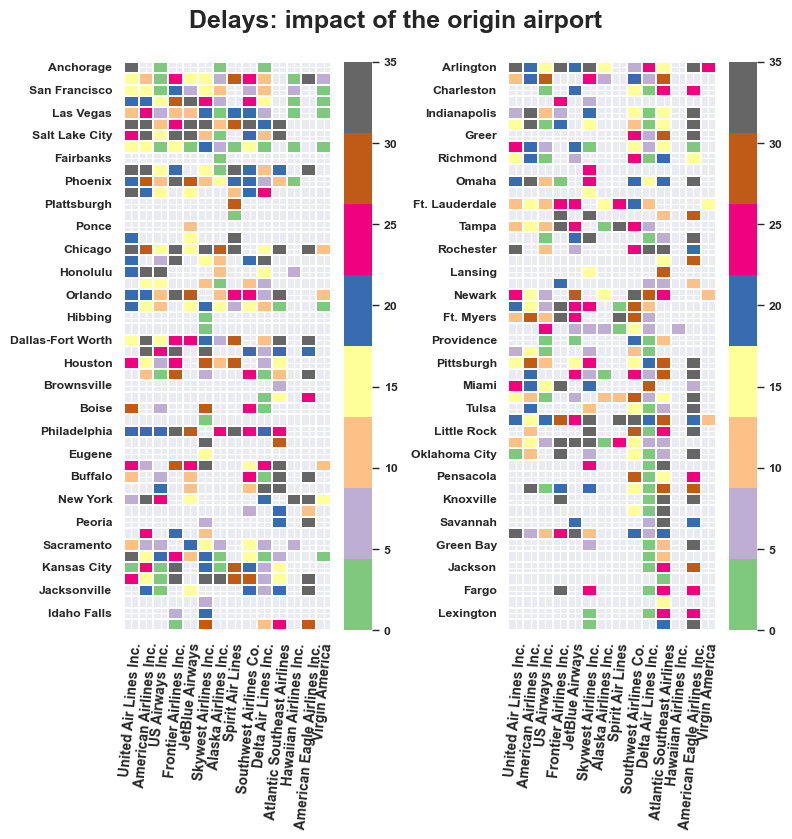

In [59]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

In [79]:
# Convert 'SCHEDULED_DEPARTURE' to datetime
flights_data['SCHEDULED_DEPARTURE'] = pd.to_datetime(flights_data['SCHEDULED_DEPARTURE'])

# Filter DataFrame for training set
delay_train = flights_data[flights_data['SCHEDULED_DEPARTURE'].dt.date < pd.to_datetime('2015-01-23').date()]

# Filter DataFrame for test set
delay_test = flights_data[flights_data['SCHEDULED_DEPARTURE'].dt.date > pd.to_datetime('2015-01-23').date()]
flights_data = delay_train

In [80]:
def get_flight_delays(flights_data, carrier, id_airport, extrem_values = False):
    flights_delay_2 = flights_data[(flights_data['AIRLINE'] == carrier) & (flights_data['ORIGIN_AIRPORT'] == id_airport)]
    #_______________________________________
    # remove extreme values before fitting
    if extrem_values:
        flights_delay_2['DEPARTURE_DELAY'] = flights_delay_2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
        flights_delay_2.dropna(how='any', inplace=True)
    #__________________________________
    # Conversion: date + heure -> heure
    flights_delay_2.sort_values('SCHEDULED_DEPARTURE', inplace = True)
    flights_delay_2['TIME_DEPARTURE'] =  flights_delay_2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
    #___________________________________________________________________
    # regroupement des vols par heure de départ et calcul de la moyenne
    test2 = flights_delay_2['DEPARTURE_DELAY'].groupby(flights_delay_2['TIME_DEPARTURE']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    #___________________________________
    # conversion de l'heure en secondes
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    test2.reset_index(inplace=True)
    test2['TIME_DEPARTURE_MIN'] = test2['TIME_DEPARTURE'].apply(fct)
    return test2

In [124]:
def get_merged_delays(flights_data, carrier):
    lijst_airports = flights_data[flights_data['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    merged_df = None
    i = 0
    lijst_columns = ['AIRPORT_ID', 'TIME_DEPARTURE_MIN', 'mean']
    for id_airport in lijst_airports:
        test2 = get_flight_delays(flights_data, carrier, id_airport, True)
        test2.loc[:, 'AIRPORT_ID'] = id_airport
        test2 = test2[lijst_columns]
        test2.dropna(how = 'any', inplace = True)
        if i == 0:
            merged_df = test2.copy()
        else:
            merged_df = pd.concat([merged_df, test2], ignore_index = True)
        i += 1    
    return merged_df

In [125]:
carrier = 'AA'
merged_df = get_merged_delays(flights_data, carrier)
merged_df.shape

C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_26316\2897491391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_delay_2['DEPARTURE_DELAY'] = flights_delay_2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_26316\2897491391.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_delay_2.dropna(how='any', inplace=True)
C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_26316\2897491391.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

(1729, 3)

In [126]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(merged_df['AIRPORT_ID'])
#__________________________________________________________
# correspondance between the codes and tags of the airports
zipped = zip(integer_encoded, merged_df['AIRPORT_ID'])
label_airports = list(set(list(zipped)))
label_airports.sort(key = lambda x:x[0])
label_airports[:5]

[(0, 'ABQ'), (1, 'ATL'), (2, 'AUS'), (3, 'BDL'), (4, 'BHM')]

In [127]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
b = np.array(merged_df['TIME_DEPARTURE_MIN'])
b = b.reshape(len(b),1)
X = np.hstack((onehot_encoded, b))
Y = np.array(merged_df['mean'])
Y = Y.reshape(len(Y), 1)
print(X.shape, Y.shape)

(1729, 82) (1729, 1)


c:\Users\Paulien Luhulima\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [128]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)
print("MSE =", metrics.mean_squared_error(predictions, Y))

MSE = 110.04591215942622


In [129]:
icount = 0
for i, val in enumerate(Y):
    if abs(val-predictions[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(predictions) * 100)

'11.97%'

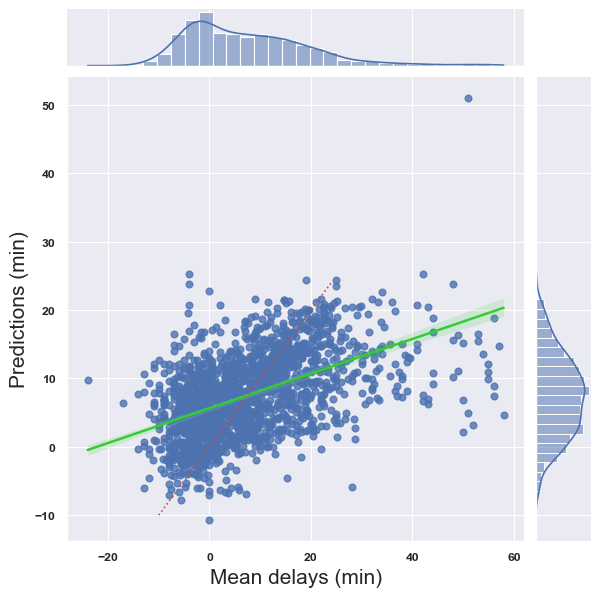

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in predictions])
tips["original_data"] = pd.Series([float(s) for s in Y])

# Create joint plot
sns.jointplot(x="original_data", y="prediction", data=tips, height=6, ratio=7,
              kind='reg', joint_kws={'line_kws': {'color': 'limegreen'}})

# Customize axis labels and add a reference line
plt.xlabel('Mean delays (min)', fontsize=15)
plt.ylabel('Predictions (min)', fontsize=15)
plt.plot(list(range(-10, 25)), list(range(-10, 25)), linestyle=':', color='r')

# Show the plot
plt.show()

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [132]:
X_train.shape

(1210, 82)

In [133]:
carrier = 'AA'
merged_df_test = get_merged_delays(delay_test, carrier)

In [137]:
label_conversion = dict()

# Check if label_airports is not None and has the expected structure
if label_airports is not None and all(isinstance(item, tuple) and len(item) == 2 for item in label_airports):
    for index, label in label_airports:
        print(index, label)
        temp = merged_df_test['AIRPORT_ID'] == label  # Use label instead of index
        temp = temp.apply(lambda x: 1.0 if x else 0.0)
        if index == 0:
            matrix_test = np.array(temp)
        else:
            matrix_test = np.vstack((matrix_test, temp))
else:
    print("label_airports is None or not in the expected format.")

# Print additional information for debugging
print("label_airports:", label_airports)
print("merged_df_test['AIRPORT_ID']:", merged_df_test['AIRPORT_ID'])
print("matrix_test shape:", matrix_test.shape)


0 ABQ


TypeError: 'NoneType' object is not subscriptable

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Create a linear regression model
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions = linear_reg_model.predict(X_test)

# Calculate the mean squared error
mse = metrics.mean_squared_error(predictions, Y_test)

# Print the mean squared error
print('MSE = {:.2f}'.format(mse))

MSE = 141.01


In [139]:
'Gemiddelde vertraging = {:.2f} min'.format(np.sqrt(mse))

'Gemiddelde vertraging = 11.87 min'

In [ ]:
#Alle NaN-waarden vervangen met gemiddelde
flights_data = flights_data.fillna(flights_data.mean())
flights_data.head()

C:\Users\Paulien Luhulima\AppData\Local\Temp\ipykernel_26316\690133070.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  flights_data = flights_data.fillna(flights_data.mean())


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,14.037161,0.071859,17.766054,26.023491,2.785979
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,14.037161,0.071859,17.766054,26.023491,2.785979
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,14.037161,0.071859,17.766054,26.023491,2.785979
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,14.037161,0.071859,17.766054,26.023491,2.785979
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,14.037161,0.071859,17.766054,26.023491,2.785979


In [ ]:
resultaat=[]
for row in flights_data['DEPARTURE_DELAY']:
  if row > 15:
    resultaat.append(1)
  else:
    resultaat.append(0) 

flights_data['RESULT'] = resultaat
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULT
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,14.037161,0.071859,17.766054,26.023491,2.785979,0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,14.037161,0.071859,17.766054,26.023491,2.785979,0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,14.037161,0.071859,17.766054,26.023491,2.785979,0
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,14.037161,0.071859,17.766054,26.023491,2.785979,0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,14.037161,0.071859,17.766054,26.023491,2.785979,0


In [ ]:
flights_data_sorteren = flights_data.sort_values(by='DEPARTURE_DELAY', ascending=False)
flights_data_sorteren.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULT
34525,2015,1,3,6,AA,MEM,DFW,1010,910.0,1380.0,1150,1054.0,4.0,0.0,1380.0,0.0,0.0,1
50551,2015,1,4,7,AA,OMA,DFW,1100,755.0,1255.0,1300,937.0,0.0,0.0,1222.0,15.0,0.0,1
69625,2015,1,5,1,AA,EGE,DFW,1355,945.0,1190.0,1705,1252.0,0.0,0.0,1019.0,168.0,0.0,1
6046,2015,1,1,4,AA,BOS,DFW,1315,905.0,1190.0,1645,1246.0,11.0,0.0,1169.0,21.0,0.0,1
52514,2015,1,4,7,DL,MIA,MSP,1300,844.0,1184.0,1601,1135.0,0.0,0.0,1174.0,0.0,0.0,1


In [ ]:
flights_data.value_counts('RESULT')

RESULT
0    67540
1    32460
dtype: int64

In [ ]:
#resultaat=[]
#for row in flights_data['SECURITY_DELAY']:
  #if row > 15:
    #resultaat.append(1)
  #else:
   # resultaat.append(0) 

#flights_data['RESULT_SECURITY'] = resultaat
#flights_data.value_counts('RESULT_SECURITY')

In [ ]:
#resultaat=[]
#for row in flights_data['WEATHER_DELAY']:
  #if row > 15:
    #resultaat.append(1)
  #else:
    #resultaat.append(0) 

#flights_data['RESULT_WEATHER'] = resultaat
#flights_data.value_counts('RESULT_WEATHER')

In [ ]:
#resultaat=[]
#for row in flights_data['AIR_SYSTEM_DELAY']:
  #if row > 15:
    #resultaat.append(1)
  #else:
    #resultaat.append(0) 

#flights_data['RESULT_AIR_SYSTEM'] = resultaat
#flights_data.value_counts('RESULT_AIR_SYSTEM')

In [ ]:
#resultaat=[]
#for row in flights_data['AIRLINE_DELAY']:
  #if row > 15:
    #resultaat.append(1)
  #else:
    #resultaat.append(0) 

#flights_data['RESULT_AIRLINE'] = resultaat
#flights_data.value_counts('RESULT_AIRLINE')

In [ ]:
#flights_data = flights_data.drop(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'YEAR', 'DAY_OF_WEEK', 'DEPARTURE_TIME', 'ARRIVAL_TIME'], axis=1)
#flights_data.head()

In [ ]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULT
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,14.037161,0.071859,17.766054,26.023491,2.785979,0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,14.037161,0.071859,17.766054,26.023491,2.785979,0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,14.037161,0.071859,17.766054,26.023491,2.785979,0
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,14.037161,0.071859,17.766054,26.023491,2.785979,0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,14.037161,0.071859,17.766054,26.023491,2.785979,0


In [ ]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   ORIGIN_AIRPORT       100000 non-null  object 
 6   DESTINATION_AIRPORT  100000 non-null  object 
 7   SCHEDULED_DEPARTURE  100000 non-null  int64  
 8   DEPARTURE_TIME       100000 non-null  float64
 9   DEPARTURE_DELAY      100000 non-null  float64
 10  SCHEDULED_ARRIVAL    100000 non-null  int64  
 11  ARRIVAL_TIME         100000 non-null  float64
 12  AIR_SYSTEM_DELAY     100000 non-null  float64
 13  SECURITY_DELAY       100000 non-null  float64
 14  AIRLINE_DELAY        100000 non-null  float64
 15  LATE_AIRCRAFT_DELA

In [ ]:
#flights_data = flights_data.fillna(0)
#flights_data['AIRLINE'] = flights_data['AIRLINE'].astype(str)
#flights_data['ORIGIN_AIRPORT'] = flights_data['ORIGIN_AIRPORT'].astype(str)
#flights_data['DESTINATION_AIRPORT'] = flights_data['DESTINATION_AIRPORT'].astype(str)


In [ ]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   ORIGIN_AIRPORT       100000 non-null  object 
 6   DESTINATION_AIRPORT  100000 non-null  object 
 7   SCHEDULED_DEPARTURE  100000 non-null  int64  
 8   DEPARTURE_TIME       100000 non-null  float64
 9   DEPARTURE_DELAY      100000 non-null  float64
 10  SCHEDULED_ARRIVAL    100000 non-null  int64  
 11  ARRIVAL_TIME         100000 non-null  float64
 12  AIR_SYSTEM_DELAY     100000 non-null  float64
 13  SECURITY_DELAY       100000 non-null  float64
 14  AIRLINE_DELAY        100000 non-null  float64
 15  LATE_AIRCRAFT_DELA

In [ ]:
#flights_data['AIRLINE'].dtype

In [ ]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULT
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,14.037161,0.071859,17.766054,26.023491,2.785979,0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,14.037161,0.071859,17.766054,26.023491,2.785979,0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,14.037161,0.071859,17.766054,26.023491,2.785979,0
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,14.037161,0.071859,17.766054,26.023491,2.785979,0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,14.037161,0.071859,17.766054,26.023491,2.785979,0


In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
for kolom in flights_data.columns:     
    if flights_data[kolom].dtype == 'object':         
        flights_data[kolom] = le.fit_transform(flights_data[kolom])

In [ ]:
from sklearn.preprocessing import LabelEncoder

flights_data = flights_data.copy()
le = LabelEncoder()
flights_data['AIRLINE'] = le.fit_transform(flights_data['AIRLINE'])
flights_data['ORIGIN_AIRPORT'] = le.fit_transform(flights_data['ORIGIN_AIRPORT'])
flights_data['DESTINATION_AIRPORT'] = le.fit_transform(flights_data['DESTINATION_AIRPORT'])

In [ ]:
data = flights_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

1.0